In [1]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


# Machine Learning For Classification

## Churn Prediction

For each customer assign a score on how likely they are to leave

Binary Classification
$$G(x_i) \approx y_i$$

$y_i  \epsilon  \{0, 1\}$

0 means negative example ie, no churn or not span
1 means positive example ie, churn or spam

## Data Preparation

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data_url = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"
data_path = "data/telecom_churn.csv"

In [4]:
!wget -O $data_path $data_url

--2024-08-25 08:49:31--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data/telecom_churn.csv’

data/telecom_churn. 100%[===================>] 954.59K  3.67MB/s    in 0.3s    

2024-08-25 08:49:32 (3.67 MB/s) - ‘data/telecom_churn.csv’ saved [977501/977501]



### Load and Peek at Data

In [5]:
df = pd.read_csv(data_path)

In [6]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


### Clean Up Column Names and Replace spaces with _

In [7]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [8]:
categorical_columns = df.dtypes[df.dtypes == 'object'].index
categorical_columns

Index(['customerid', 'gender', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod', 'totalcharges',
       'churn'],
      dtype='object')

In [9]:
for col in categorical_columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [10]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


### Look Data Types

In [11]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

#### Total Charges should be a number

In [12]:
# pd.to_numeric(df.totalcharges)

In [13]:
df.totalcharges.iloc[488] # Spaces denote no charge. this was replaced

'_'

In [14]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [15]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [16]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


#### Churn Should be 1 or 0

In [17]:
df['churn'] = (df['churn'] == 'yes').astype(int)

## Setting Up Validation Framework

In [18]:
from sklearn.model_selection import train_test_split

#### Split the dataset

In [19]:
# Split the data set into 60, 20, 20 train test and validate

In [20]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [21]:
# 20% of df = 25% of df_full_train
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [22]:
assert len(df_val) == len(df_test)

#### Reset the indices

In [23]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

#### Split Y from features

In [24]:
y_train = df_train['churn'].values
y_test = df_test['churn'].values
y_val = df_val['churn'].values
y_full_train = df_full_train['churn'].values

In [25]:
del df_train['churn']
del df_test['churn']
del df_val['churn']

## EDA

- Check Missing values
- Look at target Variables
- Look at numerical and categorical variables

In [26]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


### Missing Values

In [27]:
df_full_train.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

### Target Variable

In [28]:
df_full_train['churn'].value_counts(normalize=True) # This is called churn rate

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [29]:
global_churn_rate = df_full_train["churn"].mean()
global_churn_rate = round(global_churn_rate, 2)
global_churn_rate

0.27

### Seperate Categorical Variables

In [30]:
numeric_variables = list(df_train.dtypes[df_train.dtypes != 'object'].index)
numeric_variables.remove('seniorcitizen') # Senior citizen is just a flag
numeric_variables

['tenure', 'monthlycharges', 'totalcharges']

In [31]:
categorical_variables = list(set(df_train.dtypes.index) - set(numeric_variables))
categorical_variables.remove('customerid')
categorical_variables

['multiplelines',
 'partner',
 'seniorcitizen',
 'dependents',
 'onlinebackup',
 'onlinesecurity',
 'paymentmethod',
 'gender',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'phoneservice',
 'streamingtv',
 'deviceprotection',
 'techsupport',
 'internetservice']

### Check the unique counts of Categorical Variables

In [32]:
df_full_train[categorical_variables].nunique()

multiplelines       3
partner             2
seniorcitizen       2
dependents          2
onlinebackup        3
onlinesecurity      3
paymentmethod       4
gender              2
streamingmovies     3
contract            3
paperlessbilling    2
phoneservice        2
streamingtv         3
deviceprotection    3
techsupport         3
internetservice     3
dtype: int64

## Feature Importance: Categorical Variables

### Churn Rate within each Group

#### Gender

In [33]:
df_full_train[['gender', 'churn']].groupby(by=['gender']).mean()

,churn
gender,
female,0.276824
male,0.263214


In [34]:
global_churn_rate

0.27

#### Partner

In [35]:
df_full_train[['partner', 'churn']].groupby(by='partner').mean()

,churn
partner,
no,0.329809
yes,0.205033


In [36]:
churn_partner = df_full_train[['partner', 'churn']].groupby(by='partner').mean()
churn_partner['deviation_from_global'] = (churn_partner['churn'] - global_churn_rate) * 100
churn_partner

,churn,deviation_from_global
partner,,
no,0.329809,5.980900
yes,0.205033,-6.496669


### Feature Importance

#### Difference

- Group data
- Calculate churn rate in each group
- Get the difference between group churn and global churn
- If there is significant variation then that feature is more important

#### Risk Ratio

- Group data
- Calculate churn rate in each group
- Ratio of group churn to global churn
- $R = \frac{GROUP}{GLOBAL}$
- \> 1 More likely to churn
- \< 1 Less likely to churn

#### Feature Importance for each category

In [37]:
for category in categorical_variables:
    df_group = df_full_train.groupby(category).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)

,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012593,0.953361
no_phone_service,0.241316,547,-0.028684,0.893764
yes,0.290742,2387,0.020742,1.076820


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059809,1.221515
yes,0.205033,2702,-0.064967,0.759383


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027730,0.897297
1,0.413377,912,0.143377,1.531027


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043760,1.162074
yes,0.165666,1666,-0.104334,0.613579


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134323,1.497494
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.217232,1915,-0.052768,0.804564


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150921,1.558967
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.153226,1612,-0.116774,0.567503


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101829,0.622854
credit_card_(automatic),0.164339,1217,-0.105661,0.608661
electronic_check,0.455890,1893,0.185890,1.688482
mailed_check,0.193870,1305,-0.076130,0.718036


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006824,1.025274
male,0.263214,2838,-0.006786,0.974865


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068906,1.255209
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.307273,2200,0.037273,1.138047


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161701,1.598893
one_year,0.120573,1186,-0.149427,0.446568
two_year,0.028274,1344,-0.241726,0.104718


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097929,0.637300
yes,0.338151,3321,0.068151,1.252412


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028684,0.893764
yes,0.273049,5087,0.003049,1.011292


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072832,1.269747
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.302723,2167,0.032723,1.121195


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125875,1.466205
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.230412,1940,-0.039588,0.853379


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148914,1.551534
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.159926,1632,-0.110074,0.592320


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077653,0.712398
fiber_optic,0.425171,2479,0.155171,1.574709
no,0.077805,1221,-0.192195,0.288167


### Mutual Information

- It is a measure of mutual dependence between two random variables
- It quantifies the amount of information obtained about one random variable through the other random variable
- It tells us how much knowing one of these variables reduces uncertainty about the other
- Given entropy $$H(X) = \sum_{x \epsilon X}{p(x)\log{p(x)}}$$
- Mutual Information can be given as $$ I(X;Y) = H(X) + H(Y) - H(X|Y)$$

In [38]:
from sklearn.metrics import mutual_info_score

In [39]:
mi = df_full_train[categorical_variables].apply(lambda x: round(mutual_info_score(x, df_full_train.churn), 3))
mi.sort_values(ascending=False)

contract            0.098
onlinesecurity      0.063
techsupport         0.061
internetservice     0.056
onlinebackup        0.047
paymentmethod       0.043
deviceprotection    0.043
streamingmovies     0.032
streamingtv         0.032
paperlessbilling    0.018
dependents          0.012
partner             0.010
seniorcitizen       0.009
multiplelines       0.001
gender              0.000
phoneservice        0.000
dtype: float64

Interpretation
- High = above 0.5 nearing 1. This means that the variables are highly related
- Moderate = between 0.1 and 0.5.
- Low = Near 0. This means that the variables are independent 

## Feature Importance: Numerical Variables

### Pearson Coorelation Coefficient

- Indicates the linear relationship between two variables
- Varies from -1 to 1
- Negative values implies that as one variable increases other decreases
- $ 0.0 < |r| < 0.1 $ : Very weak or no linear relationship.
- $ 0.1 ≤ |r| < 0.3 $ : Weak linear relationship.
- $ 0.3 ≤ |r| < 0.5 $ : Moderate linear relationship.
- $ 0.5 ≤ |r| < 0.7 $ : Strong linear relationship.
- $ 0.7 ≤ |r| < 1.0 $ : Very strong linear relationship

In [40]:
df_full_train[numeric_variables].corrwith(df_full_train['churn'])

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

## One Hot Encoding

Converts Categorical Variables into a binary vector format

#### Sample

In [41]:
from sklearn.feature_extraction import DictVectorizer

In [42]:
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient='records')

In [43]:
dv = DictVectorizer(sparse=False)
dv.fit(dicts)
dv.transform(dicts)[:10]

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.]])

In [44]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male']

#### Implementation

In [45]:
df_train_dict = df_train[categorical_variables + numeric_variables].to_dict(orient='records')

In [46]:
len(numeric_variables) , len(categorical_variables)

(3, 16)

In [47]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(df_train_dict)

In [48]:
X_train.shape

(4225, 45)

Use the same vectoriser but just transform the validation data set

In [49]:
df_val_dict = df_val[categorical_variables + numeric_variables].to_dict(orient='records')
X_val = dv.transform(df_val_dict) 

In [50]:
X_val.shape

(1409, 45)

## Binary Classification

$g(x_i) = y_i$

In Binary classification

$y_i   \epsilon   \{0,1\}$

1 = Positive (Churn, default)

$g(x_i)$ is the probability of positive class

### Logistic Regression

$$ g(x_i) = \frac{1}{1 + e^{- W_i \dot X_I}}$$

- Sigmoid function always between 0 and 1.
- As the exponent increases the function reaches 1
- As the exponent decreases the function reaches 0

In [51]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

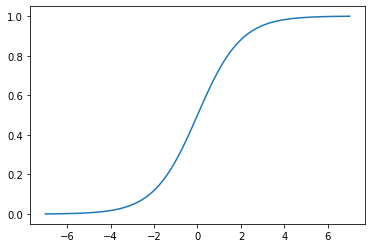

In [52]:
z = np.linspace(-7, 7, 100)
sig = sigmoid(z)
plt.plot(z, sig)

In [53]:
def logistic_regresson(x, w):
    score = np.dot(x, w)
    return sigmoid(score)

## Training Logistic Regression with sklearn

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [56]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [57]:
model.predict_proba(X_train)
# First element is probability of not churning
# Second probability of churning

array([[0.90451419, 0.09548581],
       [0.32066662, 0.67933338],
       [0.36631791, 0.63368209],
       ...,
       [0.46836442, 0.53163558],
       [0.95745706, 0.04254294],
       [0.30126876, 0.69873124]])

### Making and Using Predictions

In [58]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00899715, 0.20452667, 0.21222504, ..., 0.13639377, 0.79977245,
       0.83740873])

In [59]:
churn_decision = (y_pred >= 0.5)

In [60]:
df_val[churn_decision]['customerid'] # Send promotional offers to these customers

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

### Model Accuracy

In [61]:
(y_val == churn_decision).mean()

0.8034066713981547

In [62]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype('int')
df_pred['actual'] = y_val

In [63]:
df_pred

,probability,prediction,actual
0,0.008997,0,0
1,0.204527,0,0
2,0.212225,0,0
3,0.543053,1,1
4,0.213787,0,0
...,...,...,...
1404,0.313674,0,0
1405,0.039360,0,1
1406,0.136394,0,0
1407,0.799772,1,1


In [64]:
df_pred['correct'] = (df_pred.prediction == df_pred.actual)
df_pred[~df_pred['correct']]

,probability,prediction,actual,correct
9,0.461702,0,1,False
11,0.500721,1,0,False
14,0.065811,0,1,False
22,0.247374,0,1,False
27,0.212089,0,1,False
...,...,...,...,...
1391,0.443951,0,1,False
1392,0.505488,1,0,False
1393,0.628414,1,0,False
1394,0.494453,0,1,False


In [65]:
df_pred.correct.mean()

0.8034066713981547

### Model Interpretation

#### Join DV Feature Names and Coefficients

In [66]:
weights_full = pd.DataFrame(columns=['feature_name', 'coeff'], data=list(zip(dv.get_feature_names(), model.coef_[0].round(3))))
weights_full.head()

,feature_name,coeff
0,contract=month-to-month,0.475
1,contract=one_year,-0.175
2,contract=two_year,-0.408
3,dependents=no,-0.030
4,dependents=yes,-0.078


#### Create a Smaller Model

In [67]:
small = ['contract', 'tenure', 'monthlycharges']

In [68]:
dicts_train_small = df_train[small].to_dict(orient='records')

In [69]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [70]:
dv_small.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [71]:
X_small_train =  dv_small.transform(dicts_train_small)

In [72]:
model_small = LogisticRegression()
model_small.fit(X_small_train, y_train)

LogisticRegression()

#### Interpret Smaller model Coeff

In [73]:
w0 = model_small.intercept_[0]
w = model_small.coef_[0].round(3)

##### Interpreting Bias

In [74]:
sigmoid(w0)

0.07750241488090633

- This intercept means that if we know nothing about the customer our default position is that they will not churn
- As more information is gained, probability of churn is increased or decreased

##### Interpreting Weights

In [75]:
weights = pd.DataFrame(columns=['feature_name', 'coeff'], data=list(zip(dv_small.get_feature_names(), w)))

In [76]:
weights.sort_values('coeff', ascending=False)

,feature_name,coeff
0,contract=month-to-month,0.970
3,monthlycharges,0.027
1,contract=one_year,-0.025
4,tenure,-0.036
2,contract=two_year,-0.949


- Sigmoid zero is 0.5
- High value means that the feature will increase probability of churn
- Low value means that the feature will decrease probability of churn

## Using The Model

### Full train

Create the feature vector using dictionary vectorizer

In [77]:
dict_full_train = df_full_train.to_dict(orient='records')
dv_full = DictVectorizer(sparse=False)
X_full_train = dv_full.fit_transform(dict_full_train)

Train the model

In [78]:
model_full = LogisticRegression(max_iter=500)
model.fit(X_full_train, y_full_train)

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

The model did not converge. We need to scale the numerical values

### Scaling Numerical Features

In [79]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [80]:
X_full_train_num = df_full_train[numeric_variables].values

# scaler = StandardScaler()
scaler = MinMaxScaler()

X_full_train_num = scaler.fit_transform(X_full_train_num)

Check the difference between the features after scaling

In [81]:
df_full_train[numeric_variables[0]].head()

0    12
1    42
2    71
3    71
4    30
Name: tenure, dtype: int64

In [82]:
X_full_train_num[:5, 0]

array([0.16666667, 0.58333333, 0.98611111, 0.98611111, 0.41666667])

In [83]:
X_full_train_num.shape

(5634, 3)

### OHE Categorical Variables

In [84]:
from sklearn.preprocessing import OneHotEncoder

In [85]:
# X_full_train_cat = df_full_train[categorical_variables].values
# ohe =  OneHotEncoder(sparse=False, handle_unknown='ignore')
# X_full_train_cat = ohe.fit_transform(X_full_train_cat)

dict_full_train_cat = df_full_train[categorical_variables].to_dict(orient='records')
dv_full = DictVectorizer(sparse=False)
X_full_train_cat = dv_full.fit_transform(dict_full_train_cat)

In [86]:
X_full_train_cat.shape

(5634, 42)

### Combine the features

In [87]:
X_full_train = np.column_stack([X_full_train_num, X_full_train_cat])

In [88]:
X_full_train.shape

(5634, 45)

### Retrain the model

In [89]:
model_full = LogisticRegression(solver='lbfgs', C=1.0, random_state=42, max_iter=500)
model_full.fit(X_full_train, y_full_train)

LogisticRegression(max_iter=500, random_state=42)

### Test the model

In [90]:
X_test_num = df_test[numeric_variables].values
X_test_num = scaler.transform(X_test_num)

dict_test_cat = df_test[categorical_variables].to_dict(orient='records')
X_test_cat = dv_full.transform(dict_test_cat)

X_test = np.column_stack([X_test_num, X_test_cat])

In [91]:
X_test.shape

(1409, 45)

In [92]:
y_pred = model_full.predict_proba(X_test)[:, 1]

In [93]:
churn_decision = (y_pred >= 0.5)

In [94]:
(y_test == churn_decision).mean()

0.8112136266855926

### Using the model

In [95]:
def predict_churn(customers, numeric_variables, categorical_variables, scaler, dv_full, model):
    df_customer = pd.DataFrame(customers)
    X_num = df_customer[numeric_variables].values
    X_num = scaler.transform(X_num)

    dict_cat = df_customer[categorical_variables].to_dict(orient='records')
    X_cat = dv_full.transform(dict_cat)

    X = np.column_stack([X_num, X_cat])
    y_pred = model.predict_proba(X)[:, 1]
    churn_decision = (y_pred >= 0.5)
    return churn_decision

In [97]:
new_customers = df_test.to_dict(orient='records')[:2]

predict_churn(
    new_customers,
    numeric_variables,
    categorical_variables,
    scaler,
    dv_full,
    model_full
)

array([False, False])